Redes Neuronales Feedforward:

Es importante aclarar que las Redes Neuronales Feedforward (también conocidas como redes de alimentación directa) son un tipo de red neuronal artificial donde las conexiones entre las unidades no forman un ciclo. Este es el tipo de red neuronal más comúnmente usado y es especialmente útil para tareas de aprendizaje supervisado, que puede ser tanto de clasificación como de regresión.

In [5]:
# Importamos las librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

El siguiente paso es cargar y preprocesar nuestros datos. Cuando trabajamos con redes neuronales, generalmente queremos escalar nuestros datos para que se encuentren en un rango pequeño, como de 0 a 1. Esto ayuda a la red a aprender más efectivamente.

In [6]:
# Cargamos los datos de MNIST

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape de los datos de entrenamiento y testeo

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') # Aqui se hace un reshape de los datos de entrenamiento
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') # Aqui se hace un reshape de los datos de testeo
input_shape = (28, 28, 1) # Aqui se define el tamaño de la imagen

# Normalizamos los datos de entrenamiento y testeo

X_train , X_test = X_train / 255.0, X_test / 255.0

# Definir la Arquitectura del Modelo

Vamos a definir una red neuronal feedforward simple con tres capas. La primera capa es una capa de entrada donde la dimensión del tensor de entrada será de 28x28x1 (el tamaño de nuestras imágenes). Luego, utilizaremos una capa de "Flatten" que aplana la entrada en un vector. Las siguientes capas serán capas "Dense" (o totalmente conectadas) con funciones de activación ReLU y finalmente la capa de salida tiene 10 neuronas (para las 10 clases de dígitos del 0 al 9) con una función de activación softmax, que se utiliza para la clasificación multiclase.

In [7]:
# Definimos la arquitectura del modelo

model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Esta es una red neuronal muy básica. La primera capa, Flatten, simplemente toma nuestra imagen de entrada de 28x28 y la aplana en un vector de 1D. La siguiente capa es una capa Dense con 128 nodos (o neuronas) y la función de activación ReLU. La capa final es otra capa Dense con 10 nodos (uno para cada clase de dígitos del 0 al 9) y la función de activación softmax, que da una distribución de probabilidad en la salida, es decir, la suma de las salidas será 1.

In [8]:
# Compilamos el modelo

# Antes de entrenar el modelo, debemos compilarlo. Durante la compilación, definimos la función de pérdida, el optimizador y las métricas que usaremos para el entrenamiento.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# La función de pérdida 'sparse_categorical_crossentropy' se utiliza porque nuestras etiquetas son enteros. Si las etiquetas se codificaran en one-hot, utilizaríamos 'categorical_crossentropy'.

# 'Adam' es un optimizador popular porque ajusta automáticamente la tasa de aprendizaje.

# 'Accuracy' es una métrica adecuada para problemas de clasificación.

In [9]:
# Entrenamos el modelo

# El siguiente paso es entrenar el modelo. Para ello, utilizamos el método fit() de Keras, que escribe el bucle de entrenamiento por nosotros. Aquí, especificamos el número de épocas (iteraciones sobre el conjunto de datos de entrenamiento) y el tamaño del lote (el número de muestras por actualización de gradiente) y Keras se encarga del resto.

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# epochs = 10 significa que entrenaremos el modelo durante 10 épocas.
# validation_data = (X_test, y_test) significa que utilizaremos los datos de testeo como conjunto de validación.

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2669 - accuracy: 0.9245 - val_loss: 0.1392 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1193 - accuracy: 0.9649 - val_loss: 0.1031 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0815 - accuracy: 0.9754 - val_loss: 0.0801 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0607 - accuracy: 0.9816 - val_loss: 0.0852 - val_accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0835 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0723 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0780 - val_accuracy:

Ahora que hemos entrenado nuestro modelo, es momento de evaluar cómo se desempeña en datos que no ha visto antes (nuestro conjunto de prueba). Para hacerlo, utilizaremos la función evaluate en nuestro modelo.

In [10]:
# Evaluamos el modelo

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 821us/step - loss: 0.0756 - accuracy: 0.9782
Test accuracy: 0.9782000184059143


Esto nos dará una pérdida final (cuánto se equivoca el modelo, un valor más bajo es mejor) y una precisión (qué porcentaje de las clasificaciones el modelo hizo correctamente, un valor más alto es mejor).

In [11]:
# Hacemos predicciones

predictions = model.predict(X_test)

313/313 [==============================] - 0s 682us/step


In [12]:
# Imprimimos las predicciones

# Vamos a ver la primera predicción
print(predictions[0])

# El digito con la mayor probabilidad.
print(np.argmax(predictions[0]))

# El valor real del digito.
print(y_test[0])

[1.3073467e-08 1.2566576e-10 2.3073410e-08 1.3163740e-05 1.5554192e-13
 1.7587614e-11 4.6777952e-13 9.9998689e-01 6.2871992e-09 8.5900105e-09]
7
7


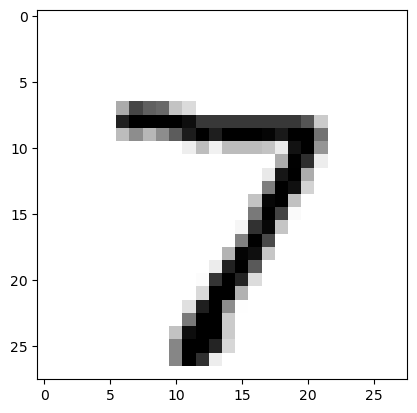

In [13]:
# Vamos a graficar la imagen para ver si la predicción es correcta.

plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

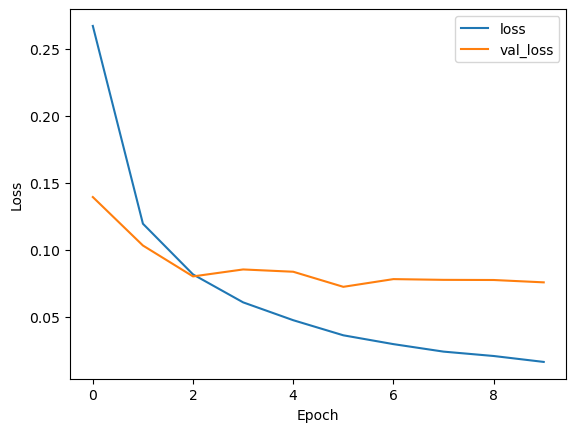

In [14]:
# Graficamos la pérdida del modelo durante el entrenamiento y la validación (la precisión del modelo en los datos de validación se llama precisión de validación).

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()